In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../')
from GPHetero import hetero_kernels, hetero_likelihoods, hetero_gpmc
from pyDOE import *
import os
from scipy.stats import norm

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [5]:
dim = 8
n = 10
noise=0
sigma = eval('lambda x: ' + str(noise))

X = np.load('../data/X_init_8d_40.npy')
Xnorm = (X - 0.5) /0.5
Y = np.load('../data/Y_init_8d_40.npy') [:, 1][:, None]

In [6]:
kerns_list = [gpflow.kernels.RBF(1), gpflow.kernels.RBF(1), gpflow.kernels.RBF(1),
             gpflow.kernels.RBF(1), gpflow.kernels.RBF(1), gpflow.kernels.RBF(1),
             gpflow.kernels.RBF(1), gpflow.kernels.RBF(1)]
mean_funcs_list = [gpflow.mean_functions.Constant(2), gpflow.mean_functions.Constant(2),
                  gpflow.mean_functions.Constant(2), gpflow.mean_functions.Constant(2),
                  gpflow.mean_functions.Constant(2), gpflow.mean_functions.Constant(2),
                  gpflow.mean_functions.Constant(2), gpflow.mean_functions.Constant(2)]
nonstat = hetero_kernels.NonStationaryLengthscaleRBF()

In [7]:
m = hetero_gpmc.GPMCAdaptiveLengthscaleMultDimDev(Xnorm, Y, kerns_list, nonstat, mean_funcs_list)

In [8]:
m.optimize(maxiter=500) # start near MAP

      fun: array([ 126.15744463])
 hess_inv: <386x386 LbfgsInvHessProduct with dtype=float64>
      jac: array([  5.86775874e+01,  -9.17382431e+01,  -6.38405502e+01,
        -2.52776312e+01,  -3.92788246e+01,   2.52091281e+01,
         5.07259655e+01,  -1.31545605e+02,  -5.07312957e+01,
        -2.37507194e+01,  -1.53729733e+00,  -2.56173157e+02,
        -5.64692459e+01,  -1.78240651e+01,  -5.93186664e+01,
         8.85607980e+00,  -3.34432819e+01,   1.05650472e+01,
        -4.72982186e+01,   7.18969035e-01,  -8.26660527e+01,
        -1.01383774e+01,  -7.01373904e-02,   3.12498377e+01,
        -1.27418887e+01,   6.47624162e-01,  -1.35751617e+01,
        -6.47626516e+00,  -1.15740532e+01,  -8.30026285e+00,
        -8.08797365e+01,   7.28841824e+00,  -2.04324653e+01,
         6.18388769e-01,  -3.47713653e+00,  -5.22106339e+00,
        -3.65434804e+00,  -5.10756981e+00,   2.32356716e+00,
         1.26970599e-01,  -2.02678131e+00,   1.18079671e+00,
        -2.43362046e+00,  -5.06366561e-01

In [9]:
samples = m.sample(1000, verbose=True, epsilon=0.00005, thin = 2, burn = 500, Lmax = 20)

burn-in sampling started
Iteration:  100 	 Acc Rate:  98.0 %
Iteration:  200 	 Acc Rate:  100.0 %
Iteration:  300 	 Acc Rate:  99.0 %
Iteration:  400 	 Acc Rate:  99.0 %
Iteration:  500 	 Acc Rate:  100.0 %
burn-in sampling ended
Iteration:  100 	 Acc Rate:  98.0 %
Iteration:  200 	 Acc Rate:  99.0 %
Iteration:  300 	 Acc Rate:  99.0 %
Iteration:  400 	 Acc Rate:  100.0 %
Iteration:  500 	 Acc Rate:  99.0 %
Iteration:  600 	 Acc Rate:  100.0 %
Iteration:  700 	 Acc Rate:  99.0 %
Iteration:  800 	 Acc Rate:  99.0 %
Iteration:  900 	 Acc Rate:  99.0 %
Iteration:  1000 	 Acc Rate:  100.0 %
Iteration:  1100 	 Acc Rate:  99.0 %
Iteration:  1200 	 Acc Rate:  99.0 %
Iteration:  1300 	 Acc Rate:  100.0 %
Iteration:  1400 	 Acc Rate:  100.0 %
Iteration:  1500 	 Acc Rate:  99.0 %
Iteration:  1600 	 Acc Rate:  100.0 %
Iteration:  1700 	 Acc Rate:  100.0 %
Iteration:  1800 	 Acc Rate:  100.0 %
Iteration:  1900 	 Acc Rate:  100.0 %
Iteration:  2000 	 Acc Rate:  100.0 %


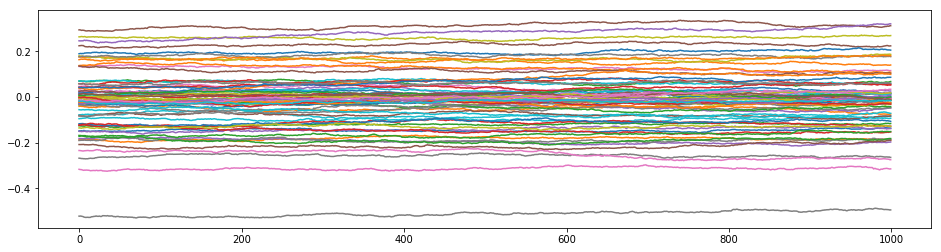

In [10]:
plt.figure(figsize=(16, 4))
plt.plot(samples[:,10:80])

In [14]:
sample_df = m.get_samples_df(samples)
mean_f_mat = np.zeros(shape=(sample_df.shape[0], Xnorm.shape[0]))
var_f_mat = np.zeros(shape=(sample_df.shape[0], Xnorm.shape[0]))

In [15]:
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean_f, var_f = m.predict(Xnorm)
    mean_f_mat[i, :] = mean_f[:,0]
    var_f_mat[i, :] = np.diag(var_f)

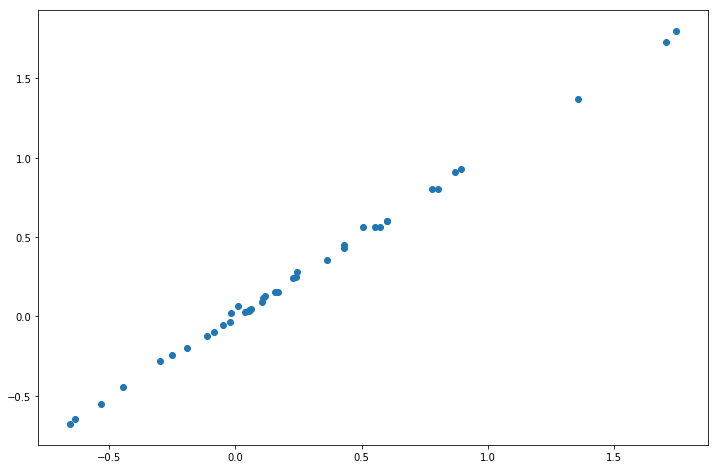

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(mean_f_mat[1,:], Y)